<a href="https://colab.research.google.com/github/nagarajesht/interview-question-data-science-/blob/master/NLP_Assignment_Airlines_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Assignment

Consider the following “tweets” data set. https://drive.google.com/file/d/1DX03AMOu7putX2HaE0-
OCVbs-yHvK-zr/view?usp=drivesdk
This dataset has the tweets from an airline company. Perform the following activities given the 
above dataset
1. Build a classification model using the airline_sentiment column as the target variable and 
use the “text” column as the input text for the model
2. Perform the following preprocessing 
a. Clean the text 
b. Create Document term matrix using the TFIDFVectorizer
c. Add additional variables or features from the dataset to improve the performance
d. Perform lemmatisation or any other form of text cleansing
e. Create a feature that counts the number of punctuation marks per each sentence
f. Create a feature that counts the length of each tweet
3. Compute metrics such as precision recall and classification for all the three classes
4. Build a feed forward neural network that can perform multi class classification

In [1]:
import pandas as pd

##Data Prepocessing

In [2]:
# Load the airlinetweets data
airlinetweets=pd.read_csv("Tweets.csv")

In [3]:
airlinetweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


### Build a classification model using the airline_sentiment column as the target variable

In [4]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
target_labels = label_encoder.fit_transform(airlinetweets['airline_sentiment'])
target_labels

array([1, 2, 1, ..., 1, 0, 1])

In [5]:
class_names=['Negative','Neutral','Positve']
# Negative - 0 (0 labelled as Negative)
# Positive - 2 (2 labelled as Positive)
# Neutral  - 1 (1 labelled as Neutral)

### Feature Engieering

In [6]:
# Columns'tweet_id', 'airline','name','tweet_coord','tweet_created','tweet_location' and 'user_timezone' are not significant to the model
# Hence above columns are deleted
airlinetweets=airlinetweets.drop(['tweet_id', 'airline','name','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)

In [7]:
airlinetweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,NaN,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,NaN,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,NaN,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,NaN,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,NaN,NaN,0,@VirginAmerica and it's a really big bad thing...


In [8]:
airlinetweets['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [9]:
# 'airline_sentiment_gold' column is identical to 'airline_sentiment'. Hence this column can be deleted.

airlinetweets=airlinetweets.drop(['airline_sentiment_gold'],axis=1)

In [10]:
airlinetweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,NaN,0,@VirginAmerica and it's a really big bad thing...


In [11]:
# 'negativereason' and 'negativereason_gold' columns are identical to 'negativereason_confidence' column. Hence these columns can be deleted.

airlinetweets=airlinetweets.drop(['negativereason','negativereason_gold'],axis=1)

In [12]:
airlinetweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,text
0,neutral,1.0000,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,0.0000,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,0.7033,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,1.0000,0,@VirginAmerica and it's a really big bad thing...


##### Analyze if feature 'retweet_count' can be included as feature for the model

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'retweet_count')

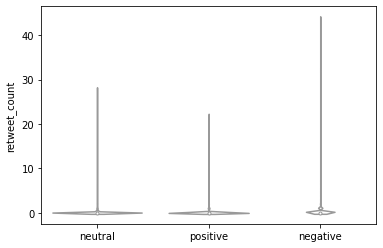

In [13]:
import seaborn as sns
ax=sns.violinplot(airlinetweets['airline_sentiment'],airlinetweets['retweet_count'],color='white')
ax.set_xlabel('')
ax.set_ylabel('retweet_count')

##### from the above plot we can conclude the relationship between retweet count and sentiment as below:



1.   Total retweet count is large for Negative sentiment 
2.   Total reweet count is small for Positive sentiment
3.   Total reweet count is medium for Neutral sentiment

Calculate average retweet count and include this average retweet value for feature extraction



In [14]:
import numpy as np
mean_retweet_count=airlinetweets.groupby('airline_sentiment')['retweet_count'].agg(np.mean)
mean_retweet_count

airline_sentiment
negative    0.093375
neutral     0.060987
positive    0.069403
Name: retweet_count, dtype: float64

In [15]:
airlinetweets.loc[airlinetweets['airline_sentiment']=='negative','retweet_count']=mean_retweet_count[0]
airlinetweets.loc[airlinetweets['airline_sentiment']=='neutral','retweet_count']=mean_retweet_count[1]
airlinetweets.loc[airlinetweets['airline_sentiment']=='positive','retweet_count']=mean_retweet_count[2]
airlinetweets['retweet_count'].value_counts()

0.093375    9178
0.060987    3099
0.069403    2363
Name: retweet_count, dtype: int64

In [16]:
airlinetweets

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,text
0,neutral,1.0000,NaN,0.060987,@VirginAmerica What @dhepburn said.
1,positive,0.3486,0.0000,0.069403,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,0.060987,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,0.7033,0.093375,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,1.0000,0.093375,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...
14635,positive,0.3487,0.0000,0.069403,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,1.0000,0.093375,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,NaN,0.060987,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,0.6659,0.093375,"@AmericanAir you have my money, you change my ..."


##### Analyze if feature 'airline_sentiment_confidence' can be included as feature for the model

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'airline_sentiment_confidence')

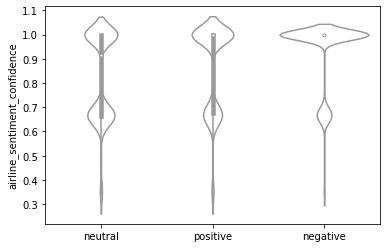

In [17]:
import seaborn as sns
ax=sns.violinplot(airlinetweets['airline_sentiment'],airlinetweets['airline_sentiment_confidence'],color='white')
ax.set_xlabel('')
ax.set_ylabel('airline_sentiment_confidence')

##### from the above plot we can conclude that there is a relationship between airline_sentiment_confidence and sentiment.Hence we can incude this as feature for the model.

In [18]:
# Ensure that there is no null values in the airline_sentiment_confidence
airlinetweets['airline_sentiment_confidence'].isnull().sum()

0

##### Feature 'Negativereason_confidence'can be included as feature for the model because there is a strong relationship exists between 'Negativereason_confidence' and 'Sentiment'

In [19]:
airlinetweets.loc[airlinetweets['airline_sentiment']=='positive','negativereason_confidence']=0
airlinetweets.loc[airlinetweets['airline_sentiment']=='neutral','negativereason_confidence']=0

In [20]:
airlinetweets['negativereason_confidence'].isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'negativereason_confidence')

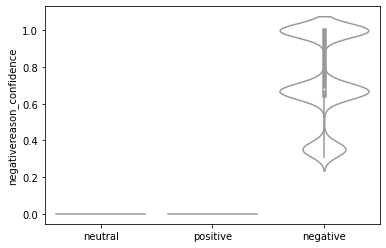

In [21]:
import seaborn as sns
ax=sns.violinplot(airlinetweets['airline_sentiment'],airlinetweets['negativereason_confidence'],color='white')
ax.set_xlabel('')
ax.set_ylabel('negativereason_confidence')

### Build a classification model using the “text” column as the input text for the model

In [22]:
# check for null values and delete if it exists in the tweet
airlinetweets['text'].isnull().sum()

0

In [23]:
# Create a feature that counts the number of punctuation marks per each sentence
import string
punctcount=[]
for i in range(14640):
  str=airlinetweets.at[i,'text']
  print(str)
  punct=0
  for j in str:
    if j in string.punctuation: 
       print("Punctuation: " + j)
       punct=punct+1
  print(punct)
  punctcount.append(punct)   
airlinetweets=airlinetweets.assign(punctuationscount=punctcount)

Streaming output truncated to the last 5000 lines.
Punctuation: .
6
@AmericanAir we tried. We are headed to a funeral in Cincinnati and your people didn't even tell us we could get on standby.
Punctuation: @
Punctuation: .
Punctuation: '
Punctuation: .
4
@AmericanAir they don't even give an option to hold.. Just say lines are busy Plz try Late Flightr
Punctuation: @
Punctuation: '
Punctuation: .
Punctuation: .
4
@AmericanAir i will be writing a very detailed letter to you all about this experience today. I have never experienced such awful cs ever
Punctuation: @
Punctuation: .
2
@AmericanAir The delay is nothing but the personnel being so combative up to the point of saying "what's the hury,  the plane is not leaving
Punctuation: @
Punctuation: "
Punctuation: '
Punctuation: ,
4
@AmericanAir delta rerouted 6 of my bags onto aa977 MIA-CUR. How can I see if they made it onto the flight?
Punctuation: @
Punctuation: -
Punctuation: .
Punctuation: ?
4
@AmericanAir would have been nice if the 

In [24]:
# Create a feature that counts the length of each tweet
tweetlength=[]
for i in range(14640):
  str=airlinetweets.at[i,'text']
  tweetlength.append(len(str)) 
airlinetweets=airlinetweets.assign(tweetlength=tweetlength)
airlinetweets

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,text,punctuationscount,tweetlength
0,neutral,1.0000,0.0000,0.060987,@VirginAmerica What @dhepburn said.,3,35
1,positive,0.3486,0.0000,0.069403,@VirginAmerica plus you've added commercials t...,6,72
2,neutral,0.6837,0.0000,0.060987,@VirginAmerica I didn't today... Must mean I n...,6,71
3,negative,1.0000,0.7033,0.093375,@VirginAmerica it's really aggressive to blast...,7,126
4,negative,1.0000,1.0000,0.093375,@VirginAmerica and it's a really big bad thing...,2,55
...,...,...,...,...,...,...,...
14635,positive,0.3487,0.0000,0.069403,@AmericanAir thank you we got on a different f...,2,63
14636,negative,1.0000,1.0000,0.093375,@AmericanAir leaving over 20 minutes Late Flig...,4,150
14637,neutral,1.0000,0.0000,0.060987,@AmericanAir Please bring American Airlines to...,2,60
14638,negative,1.0000,0.6659,0.093375,"@AmericanAir you have my money, you change my ...",7,135


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'punctuationscount')

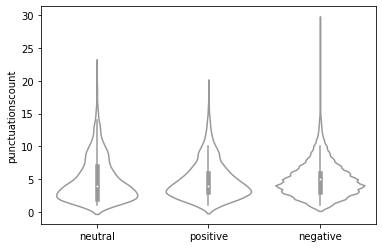

In [25]:
import seaborn as sns
ax=sns.violinplot(airlinetweets['airline_sentiment'],airlinetweets['punctuationscount'],color='white')
ax.set_xlabel('')
ax.set_ylabel('punctuationscount')

In [26]:
import numpy as np
mean_punctuations_count=airlinetweets.groupby('airline_sentiment')['punctuationscount'].agg(np.mean)
mean_punctuations_count

airline_sentiment
negative    5.028655
neutral     4.894805
positive    4.881083
Name: punctuationscount, dtype: float64

In [27]:
airlinetweets.loc[airlinetweets['airline_sentiment']=='negative','punctuationscount']=mean_punctuations_count[0]
airlinetweets.loc[airlinetweets['airline_sentiment']=='neutral','punctuationscount']=mean_punctuations_count[1]
airlinetweets.loc[airlinetweets['airline_sentiment']=='positive','punctuationscount']=mean_punctuations_count[2]
airlinetweets['punctuationscount'].value_counts()

5.028655    9178
4.894805    3099
4.881083    2363
Name: punctuationscount, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'tweetlength')

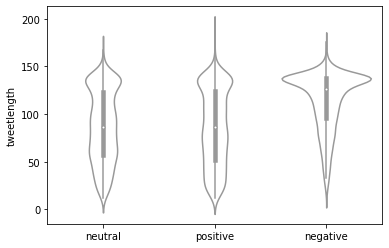

In [28]:
import seaborn as sns
ax=sns.violinplot(airlinetweets['airline_sentiment'],airlinetweets['tweetlength'],color='white')
ax.set_xlabel('')
ax.set_ylabel('tweetlength')

In [29]:
import numpy as np
mean_tweetlength=airlinetweets.groupby('airline_sentiment')['tweetlength'].agg(np.mean)
mean_tweetlength

airline_sentiment
negative    113.947919
neutral      87.359471
positive     86.082945
Name: tweetlength, dtype: float64

In [30]:
airlinetweets.loc[airlinetweets['airline_sentiment']=='negative','tweetlength']=mean_tweetlength[0]
airlinetweets.loc[airlinetweets['airline_sentiment']=='neutral','tweetlength']=mean_tweetlength[1]
airlinetweets.loc[airlinetweets['airline_sentiment']=='positive','tweetlength']=mean_tweetlength[2]
airlinetweets['tweetlength'].value_counts()

113.947919    9178
87.359471     3099
86.082945     2363
Name: tweetlength, dtype: int64

In [31]:
airlinetweets

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,text,punctuationscount,tweetlength
0,neutral,1.0000,0.0000,0.060987,@VirginAmerica What @dhepburn said.,4.894805,87.359471
1,positive,0.3486,0.0000,0.069403,@VirginAmerica plus you've added commercials t...,4.881083,86.082945
2,neutral,0.6837,0.0000,0.060987,@VirginAmerica I didn't today... Must mean I n...,4.894805,87.359471
3,negative,1.0000,0.7033,0.093375,@VirginAmerica it's really aggressive to blast...,5.028655,113.947919
4,negative,1.0000,1.0000,0.093375,@VirginAmerica and it's a really big bad thing...,5.028655,113.947919
...,...,...,...,...,...,...,...
14635,positive,0.3487,0.0000,0.069403,@AmericanAir thank you we got on a different f...,4.881083,86.082945
14636,negative,1.0000,1.0000,0.093375,@AmericanAir leaving over 20 minutes Late Flig...,5.028655,113.947919
14637,neutral,1.0000,0.0000,0.060987,@AmericanAir Please bring American Airlines to...,4.894805,87.359471
14638,negative,1.0000,0.6659,0.093375,"@AmericanAir you have my money, you change my ...",5.028655,113.947919


In [32]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

airlinetweets['text'] = airlinetweets['text'].apply(punctuation_removal)

In [33]:
airlinetweets['text'] 

0                         VirginAmerica What dhepburn said
1        VirginAmerica plus youve added commercials to ...
2        VirginAmerica I didnt today Must mean I need t...
3        VirginAmerica its really aggressive to blast o...
4        VirginAmerica and its a really big bad thing a...
                               ...                        
14635    AmericanAir thank you we got on a different fl...
14636    AmericanAir leaving over 20 minutes Late Fligh...
14637    AmericanAir Please bring American Airlines to ...
14638    AmericanAir you have my money you change my fl...
14639    AmericanAir we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object

In [35]:
# Now lets Remove the Stopwords also

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop=stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

airlinetweets['text'] = airlinetweets['text'].apply(stopwords_removal)
airlinetweets['text']

0                          [virginamerica, dhepburn, said]
1        [virginamerica, plus, added, commercials, expe...
2        [virginamerica, today, must, mean, need, take,...
3        [virginamerica, really, aggressive, blast, obn...
4                 [virginamerica, really, big, bad, thing]
                               ...                        
14635    [americanair, thank, got, different, flight, c...
14636    [americanair, leaving, 20, minutes, late, flig...
14637    [americanair, please, bring, american, airline...
14638    [americanair, money, change, flight, answer, p...
14639    [americanair, 8, ppl, need, 2, know, many, sea...
Name: text, Length: 14640, dtype: object

In [36]:
# lets remove the Numbers also
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

airlinetweets['text'] = airlinetweets['text'].apply(drop_numbers)
airlinetweets['text']

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637           americanair please bring american airlines
14638    americanair money change flight answer phones ...
14639    americanair ppl need know many seats next flig...
Name: text, Length: 14640, dtype: object

In [38]:
# Perform lemmatisation
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

airlinetweets['text'] = airlinetweets['text'].apply(lemmatise)
airlinetweets['text'] 

0                              virginamerica dhepburn said
1        virginamerica plus added commercial experience...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minute late flight warning...
14637            americanair please bring american airline
14638    americanair money change flight answer phone s...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14640, dtype: object

### Create new Feature 'Polarity' from the existing feature 'Tweet Text'

Polarity lies between -1 and +1 where -1 means negative sentiment, +1 means positive sentiment and 0 means neutral sentiment

In [42]:
# Calculate polarity from the Tweet
from textblob import TextBlob
def get_polarity(text):
  textblob=TextBlob(text)
  pol=textblob.sentiment.polarity
  return pol

airlinetweets['polarity']=airlinetweets['text'].apply(get_polarity)
airlinetweets['polarity']

0        0.000000
1        0.000000
2       -0.312500
3        0.006250
4       -0.350000
           ...   
14635    0.000000
14636   -0.300000
14637    0.000000
14638    0.000000
14639    0.166667
Name: polarity, Length: 14640, dtype: float64

## Create Document term matrix using the TFIDFVectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
matrix=vec.fit_transform(airlinetweets['text'])
print("Feature Names",vec.get_feature_names_out())
print("Sparse Matrix",matrix.shape,"n",matrix.toarray())

Feature Names ['aa' 'aaaand' 'aaadvantage' ... 'zukes' 'zurich' 'zurichnew']
Sparse Matrix (14640, 12138) n [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
vectorized_data_features = pd.DataFrame(matrix.toarray())

In [45]:
vectorized_data_features

,0,1,2,3,4,5,6,7,8,9,...,12128,12129,12130,12131,12132,12133,12134,12135,12136,12137
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
vectorized_data_features['airline_sentiment_confidence']=airlinetweets['airline_sentiment_confidence']
vectorized_data_features['negativereason_confidence']=airlinetweets['negativereason_confidence']
vectorized_data_features['retweet_count']=airlinetweets['retweet_count']
vectorized_data_features['punctuationscount']=airlinetweets['punctuationscount']
vectorized_data_features['tweetlength']=airlinetweets['tweetlength']
vectorized_data_features['polarity']=airlinetweets['polarity']
vectorized_data_features

,0,1,2,3,4,5,6,7,8,9,...,12134,12135,12136,12137,airline_sentiment_confidence,negativereason_confidence,retweet_count,punctuationscount,tweetlength,polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,0.0000,0.060987,4.894805,87.359471,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3486,0.0000,0.069403,4.881083,86.082945,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.6837,0.0000,0.060987,4.894805,87.359471,-0.312500
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,0.7033,0.093375,5.028655,113.947919,0.006250
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,1.0000,0.093375,5.028655,113.947919,-0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3487,0.0000,0.069403,4.881083,86.082945,0.000000
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,1.0000,0.093375,5.028655,113.947919,-0.300000
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,0.0000,0.060987,4.894805,87.359471,0.000000
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0000,0.6659,0.093375,5.028655,113.947919,0.000000


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_data_features,target_labels, test_size=0.3)

### Build a feed forward neural network that can perform multi class classification

In [64]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax") # output shape is 3, activation is softmax for multiclassification
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(X_train,
                       y_train,
                       epochs=20,
                       validation_data=(X_test, y_test))


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
321/321 [==============================] - 3s 9ms/step - loss: 0.9097 - accuracy: 0.5072 - val_loss: 0.7888 - val_accuracy: 0.6280
Epoch 2/20
321/321 [==============================] - 2s 6ms/step - loss: 0.6902 - accuracy: 0.6408 - val_loss: 0.5679 - val_accuracy: 0.6771
Epoch 3/20
321/321 [==============================] - 2s 7ms/step - loss: 0.4740 - accuracy: 0.7709 - val_loss: 0.4149 - val_accuracy: 0.8247
Epoch 4/20
321/321 [==============================] - 2s 6ms/step - loss: 0.3756 - accuracy: 0.8887 - val_loss: 0.3521 - val_accuracy: 0.9028
Epoch 5/20
321/321 [==============================] - 2s 7ms/step - loss: 0.3275 - accuracy: 0.9086 - val_loss: 0.3154 - val_accuracy: 0.9183
Epoch 6/20
321/321 [==============================] - 2s 7ms/step - loss: 0.2928 - accuracy: 0.9298 - val_loss: 0.2955 - val_accuracy: 0.8923
Epoch 7/20
321/321 [==============================] - 2s 6ms/step - loss: 0.2612 - accuracy: 0.9358 - val_loss: 0.2779 - val_accuracy: 0.8900
Epoch 

Text(0.5, 1.0, 'Model_14 training curves')

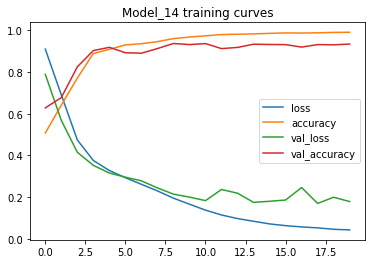

In [70]:
pd.DataFrame(history.history).plot()
plt.title("Model_14 training curves")

In [65]:
y_pred = model_14.predict(X_test)

138/138 [==============================] - 0s 3ms/step


In [66]:
# Convert all of the predictions from probabilities to labels
y_preds = y_pred.argmax(axis=1)
y_preds

array([1, 0, 1, ..., 1, 2, 2])

In [53]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

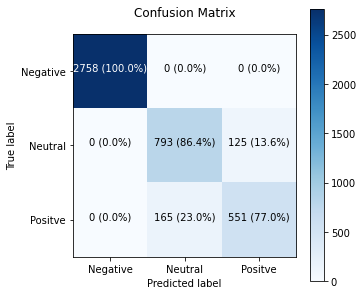

In [67]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)

In [68]:
# Compute metrics such as precision recall and classification for all the three classes
from sklearn.metrics import classification_report
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2758
     Neutral       0.83      0.86      0.85       918
    Positive       0.82      0.77      0.79       716

    accuracy                           0.93      4392
   macro avg       0.88      0.88      0.88      4392
weighted avg       0.93      0.93      0.93      4392



### Build a Random Forest model that can perform multi class classification

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
# Compute metrics such as precision recall and classification for all the three classes
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2758
     Neutral       1.00      1.00      1.00       918
    Positive       1.00      1.00      1.00       716

    accuracy                           1.00      4392
   macro avg       1.00      1.00      1.00      4392
weighted avg       1.00      1.00      1.00      4392



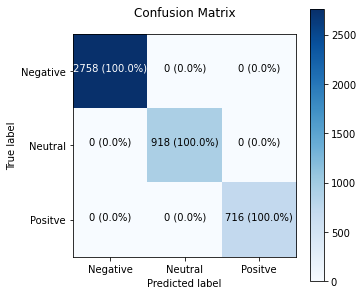

In [58]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=preds,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)